In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


In [82]:
sns.set()

In [83]:
df = pd.read_csv("FuelConsumption.csv")
df

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


In [85]:
df.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [86]:
df.isnull().sum()

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

In [87]:
# Get value counts for each column in a dictionary
value_counts_dict = {col: df[col].value_counts() for col in df.columns}

# Display the value counts for all columns
for col, counts in value_counts_dict.items():
    print(f"Value counts for column '{col}':")
    print(counts, "\n")


Value counts for column 'Year':
Year
2000    639
Name: count, dtype: int64 

Value counts for column 'MAKE':
MAKE
CHEVROLET        63
FORD             62
DODGE            46
TOYOTA           43
GMC              38
VOLKSWAGEN       36
BMW              29
AUDI             22
MERCEDES-BENZ    22
PONTIAC          21
VOLVO            21
MAZDA            20
CHRYSLER         19
NISSAN           19
HONDA            17
SATURN           15
SUZUKI           13
SUBARU           12
DAEWOO           10
HYUNDAI          10
JAGUAR           10
SAAB              9
ACURA             9
PORSCHE           8
JEEP              8
ISUZU             8
LEXUS             7
FERRARI           7
LINCOLN           6
BUICK             6
OLDSMOBILE        5
CADILLAC          5
LAND ROVER        4
INFINITI          4
KIA               4
PLYMOUTH          1
Name: count, dtype: int64 

Value counts for column 'MODEL':
MODEL
JETTA              6
LS                 6
C1500 SILVERADO    5
DAKOTA 4X4         5
DAKOTA         

In [88]:
from sklearn.preprocessing import LabelEncoder

# Get object columns
object_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}

# Create a label encoder for each object column
for col in object_columns:
    le = LabelEncoder()  # Create a LabelEncoder instance
    df[col] = le.fit_transform(df[col])  # Apply label encoding
    label_encoders[col] = le  # Store the encoder for later use (if needed)

df

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,0,0,0,1.6,4,1,3,10.5,216
1,2000,0,0,0,1.6,4,6,3,9.8,205
2,2000,0,1,2,3.2,6,4,4,13.7,265
3,2000,0,2,2,3.5,6,1,4,15.0,301
4,2000,0,164,9,1.8,4,1,3,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,35,303,7,2.4,5,1,4,14.4,288
635,2000,35,304,7,2.4,5,1,4,13.6,274
636,2000,35,305,7,2.3,5,1,4,13.9,274
637,2000,35,305,7,2.3,5,6,4,13.0,260


In [89]:
X = df.drop(["Year", "FUEL CONSUMPTION"], axis = 1).values
X.shape

(639, 8)

In [90]:
y = df["FUEL CONSUMPTION"].values
y.shape

(639,)

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .9, random_state = 42)

## Model training

In [92]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import xgboost as xgb

## Define Models

In [93]:
# List of models to test
models = [
    ("Linear Regression", LinearRegression()),
    ("Polynomial Degree 2", Pipeline([("poly", PolynomialFeatures(degree=2)), ("linear", LinearRegression())])),
    ("Polynomial Degree 3", Pipeline([("poly", PolynomialFeatures(degree=3)), ("linear", LinearRegression())])),
    ("Polynomial Degree 4", Pipeline([("poly", PolynomialFeatures(degree=4)), ("linear", LinearRegression())])),
    ("Lasso Regression", Lasso()),
    ("Ridge Regression", Ridge()),
    ("Random Forest", RandomForestRegressor()),
    ("XGBoost", xgb.XGBRegressor())
]


## Train and Evaluate Models

In [94]:
# Create an empty list to store results
results = []

# Iterate over the list of models
for name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R², RMSE, MAE for training and testing
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)

    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Append the results
    results.append({
        "Model": name,
        "R² (Train)": r2_train,
        "RMSE (Train)": rmse_train,
        "MAE (Train)": mae_train,
        "R² (Test)": r2_test,
        "RMSE (Test)": rmse_test,
        "MAE (Test)": mae_test
    })


## Plot Results

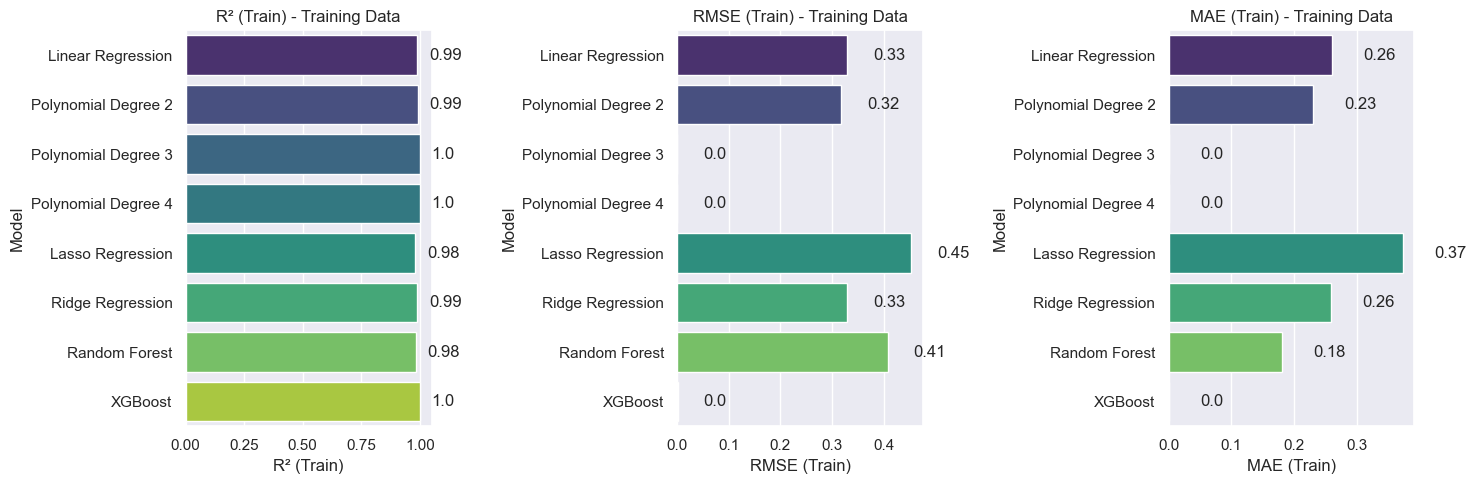

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the metrics to plot
metrics = ["R² (Train)", "RMSE (Train)", "MAE (Train)"]

# Create a DataFrame with results
results_df = pd.DataFrame(results)

# Create subplots for training data
fig, ax = plt.subplots(1, len(metrics), figsize=(15, 5))

# Plot each metric on a separate subplot for training
for i, metric in enumerate(metrics):
    sns.barplot(data=results_df, x=metric, y="Model", ax=ax[i], palette="viridis", legend=False)
    ax[i].set_title(f'{metric} - Training Data')

    # Annotate the bars with the value of the metric
    for p in ax[i].patches:
        width = p.get_width()  # Get the bar's width
        ax[i].text(width + 0.05, p.get_y() + p.get_height() / 2,  # Position the text
                   round(p.get_width(), 2),  # Text to display, rounded to 2 decimals
                   va='center')  # Align the text to the center of the bar

plt.tight_layout()
plt.show()


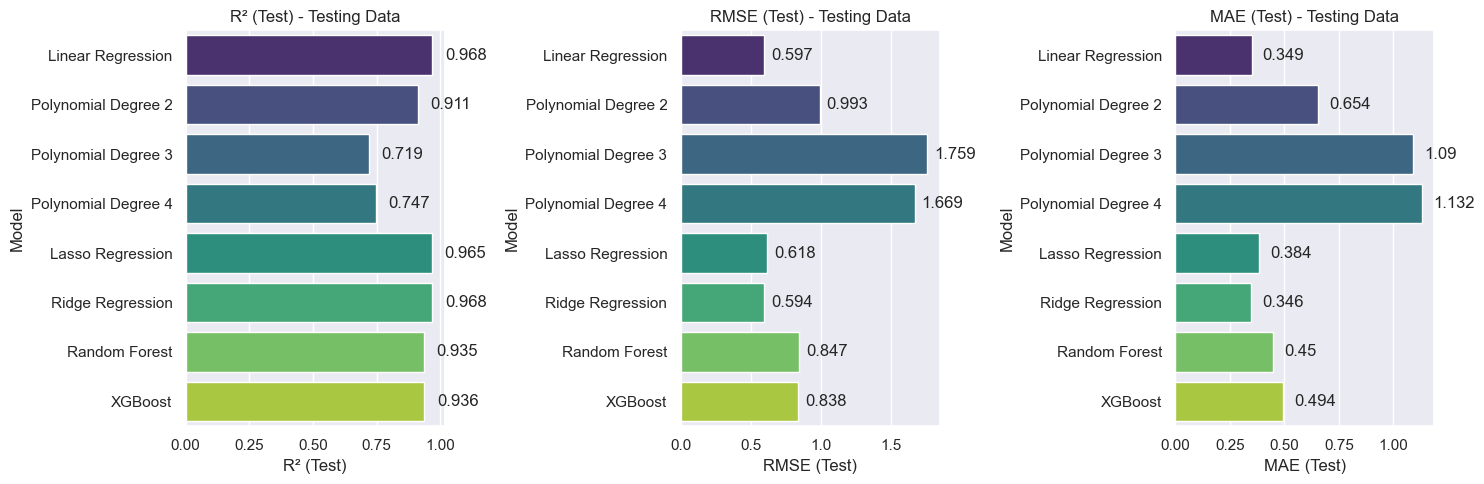

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define metrics for the testing data
metrics_test = ["R² (Test)", "RMSE (Test)", "MAE (Test)"]

# Create subplots for testing data
fig, ax = plt.subplots(1, len(metrics_test), figsize=(15, 5))

# Plot each metric on a separate subplot for testing
for i, metric in enumerate(metrics_test):
    sns.barplot(data=results_df, x=metric, y="Model", ax=ax[i], palette="viridis", legend=False)
    ax[i].set_title(f'{metric} - Testing Data')

    # Annotate the bars with the value of the metric
    for p in ax[i].patches:
        width = p.get_width()  # Get the bar's width
        ax[i].text(width + 0.05, p.get_y() + p.get_height() / 2,  # Position the text
                   round(p.get_width(), 3),  # Text to display, rounded to 2 decimals
                   va='center')  # Align the text to the center of the bar

plt.tight_layout()
plt.show()
